In [1]:
from model import *

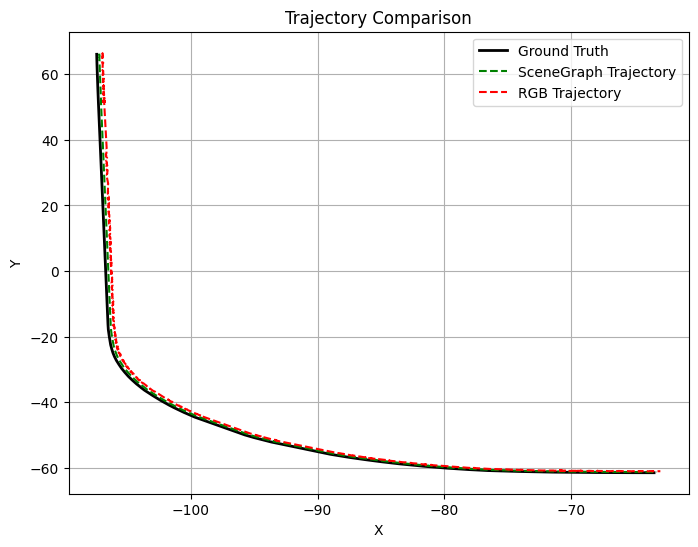

In [2]:
import random
import matplotlib.pyplot as plt
def plot_trajectories(gt, scenegraph, rgb):
    # Ground truth
    x_gt = [p[1] for p in gt]
    y_gt = [p[2] for p in gt]

    # SceneGraph
    x_sc = [p[1] for p in scenegraph]
    y_sc = [p[2] for p in scenegraph]

    # RGB
    x_rgb = [p[1] for p in rgb]
    y_rgb = [p[2] for p in rgb]

    plt.figure(figsize=(8,6))
    plt.plot(x_gt, y_gt, 'k-', label="Ground Truth", linewidth=2)
    plt.plot(x_sc, y_sc, 'g--', label="SceneGraph Trajectory")
    plt.plot(x_rgb, y_rgb, 'r--', label="RGB Trajectory")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trajectory Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "/home/irfan/ThesisCode/examples/transferdata/pos.txt"  # <-- change to your file path
    ground_truth = read_positions(file_path, max_points=1500)

    # Generate versions with error
    scenegraph_traj = generate_with_error(ground_truth, (0.2, 0.21))
    rgb_traj = generate_with_error(ground_truth, (0.4, 0.5))

    # Plot results
    plot_trajectories(ground_truth, scenegraph_traj, rgb_traj)


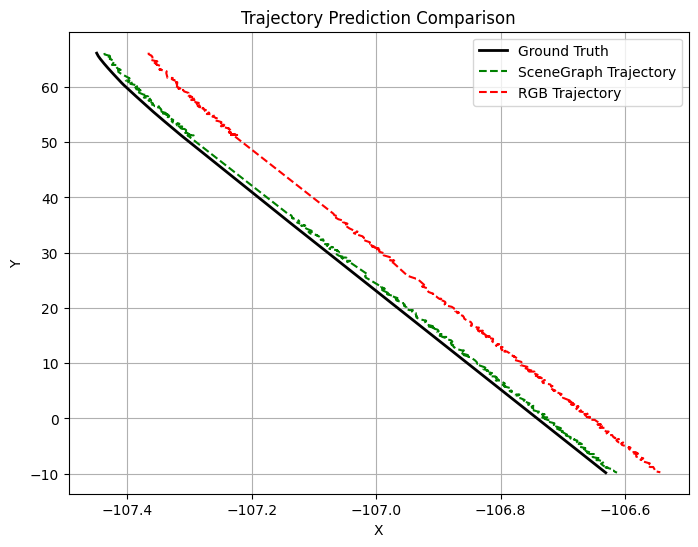

In [3]:
def plot_trajectories(gt, scenegraph, rgb):
    # Ground truth
    x_gt = [p[1] for p in gt]
    y_gt = [p[2] for p in gt]

    # SceneGraph
    x_sc = [p[1] for p in scenegraph]
    y_sc = [p[2] for p in scenegraph]

    # RGB
    x_rgb = [p[1] for p in rgb]
    y_rgb = [p[2] for p in rgb]

    plt.figure(figsize=(8,6))
    plt.plot(x_gt, y_gt, 'k-', label="Ground Truth", linewidth=2)
    plt.plot(x_sc, y_sc, 'g--', label="SceneGraph Trajectory")
    plt.plot(x_rgb, y_rgb, 'r--', label="RGB Trajectory")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trajectory Prediction Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "/home/irfan/ThesisCode/examples/transferdata/pos.txt"  # <-- change to your file path
    ground_truth = read_positions(file_path, max_points=1000)

    # Generate versions with error in x,y
    scenegraph_traj = generate_with_error(ground_truth, (0.01, 0.02))
    rgb_traj = generate_with_error(ground_truth, (0.08, 0.09))

    # Plot results
    plot_trajectories(ground_truth, scenegraph_traj, rgb_traj)


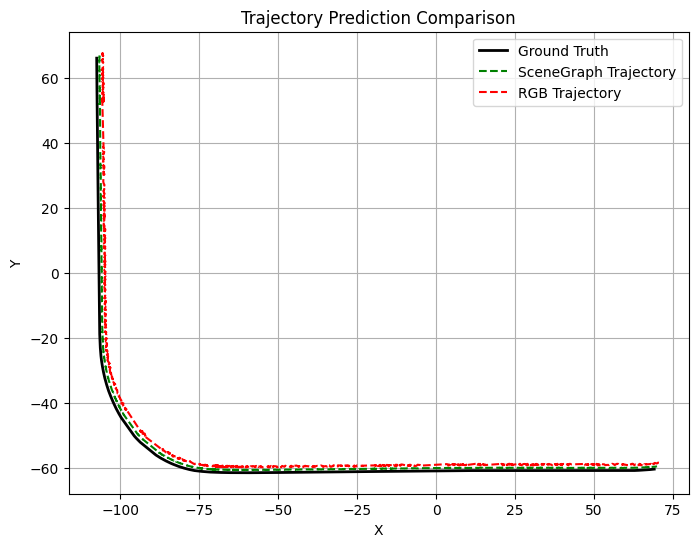

In [4]:
import random
import matplotlib.pyplot as plt

def plot_trajectories(gt, scenegraph, rgb):
    # Ground truth
    x_gt = [p[1] for p in gt]
    y_gt = [p[2] for p in gt]

    # SceneGraph
    x_sc = [p[1] for p in scenegraph]
    y_sc = [p[2] for p in scenegraph]

    # RGB
    x_rgb = [p[1] for p in rgb]
    y_rgb = [p[2] for p in rgb]

    plt.figure(figsize=(8,6))
    plt.plot(x_gt, y_gt, 'k-', label="Ground Truth", linewidth=2)
    plt.plot(x_sc, y_sc, 'g--', label="SceneGraph Trajectory")
    plt.plot(x_rgb, y_rgb, 'r--', label="RGB Trajectory")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trajectory Prediction Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "/home/irfan/ThesisCode/examples/transferdata/pos.txt"  # <-- change to your file path
    ground_truth = read_positions(file_path, max_points=2000)

    # Generate versions with error in x,y
    scenegraph_traj = generate_with_error(ground_truth, (0.8, 0.9))
    rgb_traj = generate_with_error(ground_truth, (1.6, 2.1))

    # Plot results
    plot_trajectories(ground_truth, scenegraph_traj, rgb_traj)

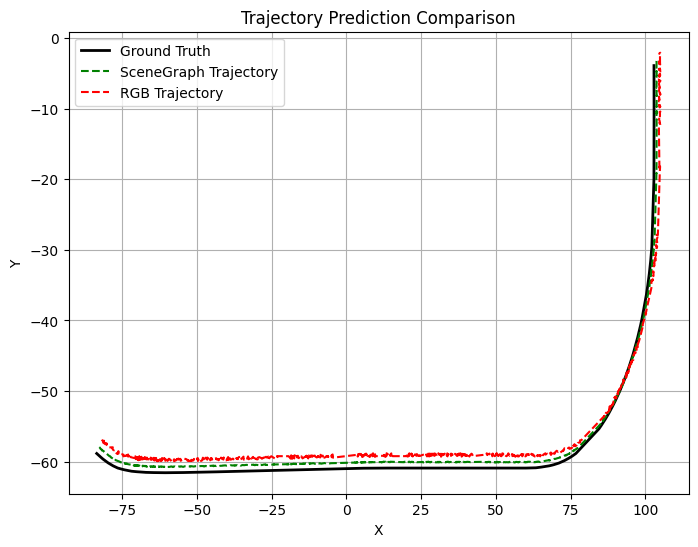

In [6]:
import random
import matplotlib.pyplot as plt

def plot_trajectories(gt, scenegraph, rgb):
    # Ground truth
    x_gt = [p[1] for p in gt]
    y_gt = [p[2] for p in gt]

    # SceneGraph
    x_sc = [p[1] for p in scenegraph]
    y_sc = [p[2] for p in scenegraph]

    # RGB
    x_rgb = [p[1] for p in rgb]
    y_rgb = [p[2] for p in rgb]

    plt.figure(figsize=(8,6))
    plt.plot(x_gt, y_gt, 'k-', label="Ground Truth", linewidth=2)
    plt.plot(x_sc, y_sc, 'g--', label="SceneGraph Trajectory")
    plt.plot(x_rgb, y_rgb, 'r--', label="RGB Trajectory")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trajectory Prediction Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "/home/irfan/ThesisCode/examples/transferdata/town2.txt"  # <-- change to your file path
    ground_truth = read_positions(file_path, max_points=2000)

    # Generate versions with error in x,y
    scenegraph_traj = generate_with_error(ground_truth, (0.8, 0.9))
    rgb_traj = generate_with_error(ground_truth, (1.6, 2.1))

    # Plot results
    plot_trajectories(ground_truth, scenegraph_traj, rgb_traj)

In [4]:
scenegraph_extraction_config = configuration(r"/home/irfan/roadscene2vec/examples/use_case_2_scenegraph_extraction_config.yaml",from_function = True) #create scenegraph extraction config object

sg_extraction_object = RealEx.RealExtractor(scenegraph_extraction_config) #creating Real Image Preprocessor using config
sg_extraction_object.load() #preprocesses sequences by extracting frame data for each sequence
scenegraph_dataset = sg_extraction_object.getDataSet() #returned scenegraphs from extraction
scenegraph_dataset.save() #save ScenegraphDataset


# extracted_scenegraphs = extract_seq(scenegraph_extraction_config) #extracted scenegraphs for each frame for the given sequence into a ScenegraphDataset 
# training_config = configuration("/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
# trainer = Scenegraph_Trainer(training_config) #create trainer object using config

  0%|          | 0/1 [00:00<?, ?it/s]/home/irfan/miniconda3/envs/test_env/lib/python3.9/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Boxes: Boxes(tensor([[ 785.5082,  385.8770, 1084.0192,  510.8224],
        [ 270.3557,  384.6895,  502.0559,  496.8985]], device='cuda:0')), Labels: tensor([2, 2], device='cuda:0'), Image Size: (720, 1280)
Detections: [([785.5081787109375, 385.8769836425781, 298.510986328125, 124.94537353515625], 0.5, 2), ([270.35565185546875, 384.6895446777344, 231.70022583007812, 112.208984375], 0.5, 2)]
tracks   [<deep_sort_realtime.deep_sort.track.Track object at 0x7aaf582447c0>, <deep_sort_realtime.deep_sort.track.Track object at 0x7aaf582445b0>]
(Boxes(tensor([[ 785.5082,  385.8770, 1084.0192,  510.8224],
        [ 270.3557,  384.6895,  502.0559,  496.8985]], device='cuda:0')), tensor([2, 2], device='cuda:0'), (720, 1280))
Extracting scene graph for sequence 22 frame 97095 with 0 tracks
Adding node:  Root Road Root Road
Adding node:  ego car ego car
Adding node:  Left Lane Left Lane
Adding node:  Right Lane Right Lane
Adding node:  Middle Lane Middle Lane
Boxes:  Boxes(tensor([[ 785.5082,  385.87

100%|██████████| 1/1 [00:10<00:00, 10.34s/it]

Boxes: Boxes(tensor([[ 706.4570,  435.7354, 1274.6490,  714.3795]], device='cuda:0')), Labels: tensor([2], device='cuda:0'), Image Size: (720, 1280)
Detections: [([706.45703125, 435.7353515625, 568.1920166015625, 278.64410400390625], 0.5, 2)]
tracks   [<deep_sort_realtime.deep_sort.track.Track object at 0x7aaf582447c0>, <deep_sort_realtime.deep_sort.track.Track object at 0x7aaf582393d0>]
(Boxes(tensor([[ 706.4570,  435.7354, 1274.6490,  714.3795]], device='cuda:0')), tensor([2], device='cuda:0'), (720, 1280))
Extracting scene graph for sequence 22 frame 97114 with 2 tracks
Adding node:  Root Road Root Road
Adding node:  ego car ego car
Adding node:  Left Lane Left Lane
Adding node:  Right Lane Right Lane
Adding node:  Middle Lane Middle Lane
Boxes:  Boxes(tensor([[ 706.4570,  435.7354, 1274.6490,  714.3795]], device='cuda:0'))
Processing bounding box:  car
Actor:  ego_car
Actor:  car
Actor type:  car
Actor actor_:  1
Actor:  moto
Actor:  bicycle
Actor:  ped
Actor:  lane
Actor:  light
A

In [6]:
training_config = configuration("/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
trainer = Scenegraph_Trainer(training_config) #create trainer object using config
# trainer.split_dataset() #split ScenegraphDataset specified in learning config into training, testing data
# trainer.build_model() #build model specified in learning config
# trainer.learn()

In [13]:
#  training_config = configuration(r"use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
    # trainer = Scenegraph_Trainer(training_config) #create trainer object using config
sys.modules['util'] = roadscene2vec.util


def format_use_case_model_input(sequence, trainer):
        if trainer.config.training_configuration["scenegraph_dataset_type"] == "carla":
            for seq in sequence.scene_graphs:
                data = {"sequence":trainer.scene_graph_dataset.process_carla_graph_sequences(sequence.scene_graphs[seq], feature_list = trainer.feature_list, folder_name = sequence.folder_names[0]) , "label":None, "folder_name": sequence.folder_names[0]}
        elif trainer.config.training_configuration["scenegraph_dataset_type"] == "real": #by default the ScenegraphDataset extracted from a "real" image based sequence
            for seq in sequence.scene_graphs:
                data = {"sequence":trainer.scene_graph_dataset.process_real_image_graph_sequences(sequence.scene_graphs[seq], feature_list = trainer.feature_list, folder_name = sequence.folder_names[0]) , "label":None, "folder_name": sequence.folder_names[0]}
        else:
            raise ValueError('output():scenegraph_dataset_type unrecognized')
        data = data['sequence']
        graph_list = [Data(x=g['node_features'], edge_index=g['edge_index'], edge_attr=g['edge_attr']) for g in data]  
        train_loader = DataLoader(graph_list, batch_size=len(graph_list))
        sequence = next(iter(train_loader)).to(trainer.config.model_configuration["device"])
        
        return (sequence.x, sequence.edge_index, sequence.edge_attr, sequence.batch)    


def extract_seq(scenegraph_extraction_config):                                                                                          
    sg_extraction_object = RealEx.RealExtractor(scenegraph_extraction_config) #creating Real Image Preprocessor using config
    sg_extraction_object.load() #preprocesses sequences by extracting frame data for each sequence
    scenegraph_dataset = sg_extraction_object.getDataSet() #returned scenegraphs from extraction
    scenegraph_dataset.save() #save ScenegraphDataset
    return scenegraph_dataset #return ScenegraphDataset
    
def risk_assess():
    scenegraph_extraction_config = configuration(r"/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create scenegraph extraction config object
    extracted_scenegraphs = extract_seq(scenegraph_extraction_config) #extracted scenegraphs for each frame for the given sequence into a ScenegraphDataset 
    training_config = configuration("/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
    trainer = Scenegraph_Trainer(training_config) #create trainer object using config
    trainer.split_dataset() #split ScenegraphDataset specified in learning config into training, testing data
    trainer.build_model() #build model specified in learning config
    trainer.learn()
    model_input = format_use_case_model_input(extracted_scenegraphs, trainer) #turn extracted original sequence's extracted ScenegraphDataset into model input
    output, _ = trainer.model.forward(*model_input) #output risk assessment for the original sequence 
    return output   

# if __name__ == "__main__":
#     print(risk_assess()) #Assess risk of a driving sequence

In [5]:
# import os
# sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from roadscene2vec.learning.model.cnn_lstm import CNN_LSTM_Classifier

In [3]:
import sys, pdb
# from pathlib import Path
# sys.path.append(str(Path("../../")))
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
from roadscene2vec.data.dataset import SceneGraphDataset
# from torch_geometric.data import Data, DataLoader, DataListLoader 
# from  util import *
from roadscene2vec.learning.util.metrics import get_metrics, log_wandb, log_wandb_transfer_learning 
from roadscene2vec.learning.util import *

scene_graph_dataset  = SceneGraphDataset()
scene_graph_dataset.dataset_save_path ="/home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl"
scene_graph_dataset_ = scene_graph_dataset.load()  

loading dataset /home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl


In [4]:
from torch_geometric.data import Data, DataLoader, DataListLoader 


In [5]:
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
from roadscene2vec.learning.util.trainer import Trainer
from roadscene2vec.data.dataset import SceneGraphDataset
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader, DataListLoader
from roadscene2vec.learning.util.metrics import get_metrics, log_wandb, log_wandb_transfer_learning 

In [6]:
from roadscene2vec.util.config_parser import configuration
# import roadscene2vec.scene_graph.extraction.image_extractor as RealEx
from roadscene2vec.learning.util.scenegraph_trainer import Scenegraph_Trainer




In [7]:
import roadscene2vec
from roadscene2vec.util.config_parser import configuration
import roadscene2vec.scene_graph.extraction.image_extractor as RealEx
from roadscene2vec.learning.util.scenegraph_trainer import Scenegraph_Trainer
from torch_geometric.data import Data, DataLoader
training_config = configuration(r"/home/irfan/roadscene2vec/examples/use_case_2_learning_config.yaml",from_function = True) #create training config object                                                                                                               
trainer = Scenegraph_Trainer(training_config) #create trainer object using config
# trainer.build_transfer_learning_dataset() #build the dataset for transfer learning

In [9]:
scene_graph_dataset  = SceneGraphDataset()
scene_graph_dataset.dataset_save_path ="/home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl"
scene_graph_dataset_ = scene_graph_dataset.load() 
sorted_seq = sorted(scene_graph_dataset_.labels)
print(f"Number of sequences: {(sorted_seq)}")

loading dataset /home/irfan/roadscene2vec/examples/use_case_1_sg_extraction_output.pkl
Number of sequences: [22]
